# Configuration

In [1]:
# Parameters
PROJECT_NAME = 'ML1010-Group-Project'
ENABLE_COLAB = False

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_INIT_DIR = COLAB_ROOT_DIR + '/utility_files'

LOCAL_ROOT_DIR = '/home/magni//ML_Root/project_root'
LOCAL_INIT_DIR = LOCAL_ROOT_DIR + '/utility_files'

# Bootstrap Environment

In [2]:
#add in support for utility file directory and importing
import sys
import os

if ENABLE_COLAB:
  #Need access to drive
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  
  #add in utility directory to syspath to import 
  INIT_DIR = COLAB_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  #add in utility directory to syspath to import
  INIT_DIR = LOCAL_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = LOCAL_ROOT_DIR

#Import Utility Support
from jarvis import Jarvis
jarvis = Jarvis(ROOT_DIR, PROJECT_NAME)

import mv_python_utils as mvutils

Wha...where am I?
I am awake now.

I have set your current working directory to /home/magni/ML_Root/project_root/ML1010-Group-Project
The current time is 20:11
Hello sir. I hope you had dinner.



# Setup Runtime Environment

In [3]:
if ENABLE_COLAB:
  #!pip install scipy -q
  #!pip install scikit-learn -q
  #!pip install pycaret -q
  #!pip install matplotlib -q
  #!pip install joblib -q
  #!pip install pandasql -q
  !pip install umap_learn -q
  !pip install sentence_transformers -q
  !pip install spacytextblob -q
  !pip install flair -q
  display('Google Colab enabled')
else:
  display('Google Colab not enabled')

#Common imports
import json
import pandas as pd
import numpy as np
import matplotlib
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
#from yellowbrick.classifier import ConfusionMatrix
#from sklearn.linear_model import LogisticRegression
from yellowbrick.target import ClassBalance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

nltk.download('stopwords')
%matplotlib inline

'Google Colab not enabled'

[nltk_data] Downloading package stopwords to /home/magni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import cw_df_metric_utils as cwutils
import importlib
import DataPackage as dp
import DataPackageSupport as dps
import DataExperiment
import DataExperimentSupport

2022-01-11 20:11:47.276629: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-11 20:11:47.276656: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
axis_labels5=[1,2,3,4,5]
axis_labels2=[0,1]

# Load Data

In [6]:
importlib.reload(dp)
importlib.reload(dps)
importlib.reload(DataExperiment)
importlib.reload(DataExperimentSupport)

<module 'DataExperimentSupport' from '/home/magni/ML_Root/project_root/utility_files/DataExperimentSupport.py'>

In [7]:
testDf = pd.read_pickle(jarvis.DATA_DIR_WORK + "/01_NL_ReviewText_All(new).pkl.gz")
testFilename = '01_dataExperimentTest'
#mvutils.exploreDataframe (testDf, numRecords=1)
testDfBert = cwutils.getBertEncodeFrame(df=testDf,
                                        bertColumn='reviewText_lemma_bert',
                                        uniqueColumn='uuid',
                                        otherColumns=['overall']
                                        )

In [8]:
#classifier = XGBClassifier(eval_metric='mlogloss')
#experimentName = 'ReviewText_Lemma_Bert (XGBoost)'

#classifier = SVC(gamma=0.001, verbose=True)
#experimentName = 'ReviewText_Lemma_Bert (SVC)'

classifier = RandomForestClassifier()
experimentName = 'ReviewText_Lemma_Bert (SVC)'

myExp = DataExperiment.DataExperiment(projectName='ML1010-Group Project',
                                      experimentName=experimentName,
                                      origData=testDfBert,
                                      uniqueColumn='uuid',
                                      targetColumn='overall',
                                      classifier=classifier)

DataExperiment summary:
---> projectName: ML1010-Group Project
---> experimentName: ReviewText_Lemma_Bert (SVC)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: False
---> isBaseModelPredicted: False
---> isBaseModelLearningCurveCreated: False
---> isFinalModelLoaded: False
---> isFinalModelPredicted: False
---> isFinalModelLearningCurveCreated: False
---> isClassifierLoaded: True
RandomForestClassifier()

    DataPackage summary:
    Attributes:
    ---> uniqueColumn: uuid
    ---> targetColumn: overall
    Process:
    ---> isBalanced: False
    ---> isTrainTestSplit: False
    Data:
    ---> isOrigDataLoaded: True
    ---> isTrainDataLoaded: False
    ---> isTestDataLoaded: False


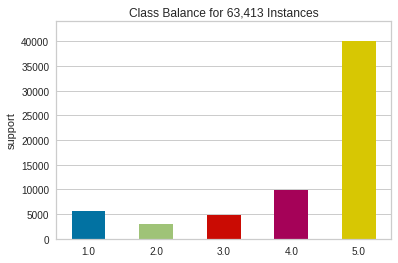

Undersampling data to match min class: 2.0 of size: 2946


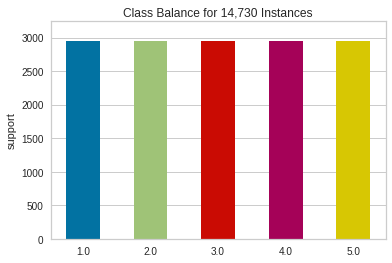

Completed train/test split (test_size = 0.2):
---> Original data size: 14730
---> Training data size: 11784
---> Testing data size: 2946
---> Stratified on column: overall


In [9]:
myExp.processDataPackage()

In [10]:
myExp.createBaseModel()

In [11]:
myExp.predictBaseModel()

'*** Need to show some sort of graph for prediction ***'

              precision    recall  f1-score   support

         1.0       0.48      0.62      0.54       589
         2.0       0.37      0.36      0.37       589
         3.0       0.35      0.25      0.29       590
         4.0       0.36      0.41      0.38       589
         5.0       0.61      0.54      0.57       589

    accuracy                           0.44      2946
   macro avg       0.44      0.44      0.43      2946
weighted avg       0.44      0.44      0.43      2946



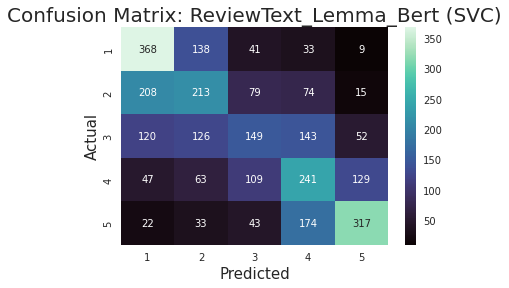

In [12]:
myExp.showBaseModelTestReport(axis_labels5)

In [13]:
importlib.reload(dp)
importlib.reload(dps)
importlib.reload(DataExperiment)
importlib.reload(DataExperimentSupport)

<module 'DataExperimentSupport' from '/home/magni/ML_Root/project_root/utility_files/DataExperimentSupport.py'>

  0%|          | 0/101 [00:00<?, ?it/s]

Feature Importance Summary:
---> Original feature count: 768
---> Returned feature count: 45
---> Removed feature count: 723
---> Return items above (including): 0.002


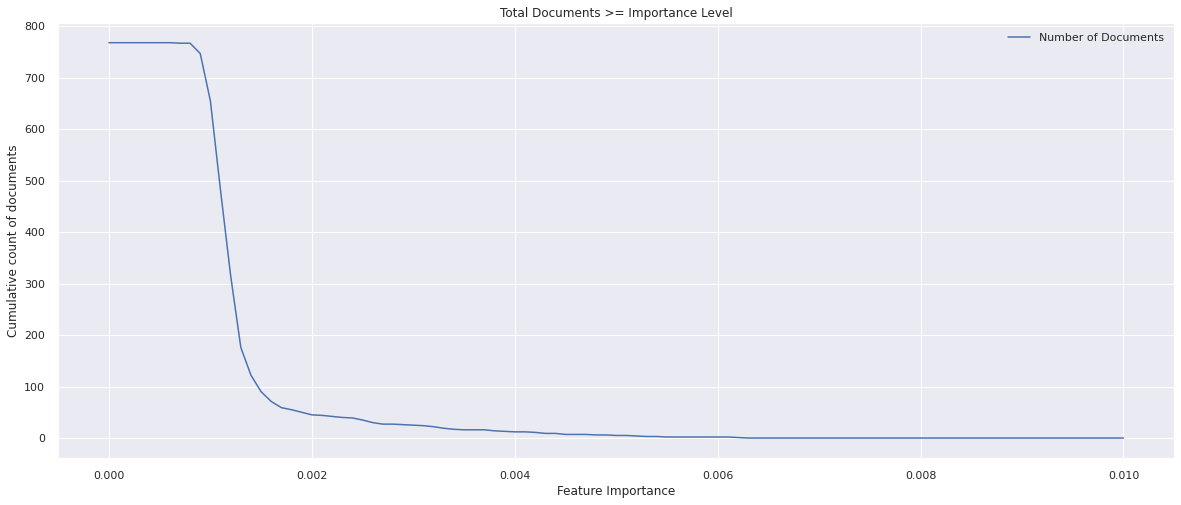

In [14]:
impFeatures = myExp.analyzeBaseModelFeatureImportance(returnAbove=0.002)

In [15]:
myExp.createFinalModel(featureImportanceThreshold=0.0017)

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

In [16]:
myExp.predictFinalModel()
myExp.display()

'*** Need to show some sort of graph for prediction ***'

DataExperiment summary:
---> projectName: ML1010-Group Project
---> experimentName: ReviewText_Lemma_Bert (SVC)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: True
---> isBaseModelPredicted: True
---> isBaseModelLearningCurveCreated: False
---> isFinalModelLoaded: True
---> isFinalModelPredicted: True
---> isFinalModelLearningCurveCreated: False
---> isClassifierLoaded: True
RandomForestClassifier()

    DataPackage summary:
    Attributes:
    ---> uniqueColumn: uuid
    ---> targetColumn: overall
    Process:
    ---> isBalanced: True
    ---> isTrainTestSplit: True
    Data:
    ---> isOrigDataLoaded: False
    ---> isTrainDataLoaded: True
    ---> isTestDataLoaded: True


In [17]:
myExp.createBaseModelLearningCurve()

[learning_curve] Training set sizes: [ 942 1885 4713 9427]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.970, test=0.401) total time=   0.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] END ..................., score=(train=0.963, test=0.395) total time=   2.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] END ..................., score=(train=0.952, test=0.412) total time=   5.8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.8s remaining:    0.0s


[CV] END ..................., score=(train=0.949, test=0.421) total time=  13.4s
[CV] END ..................., score=(train=0.955, test=0.411) total time=   0.9s
[CV] END ..................., score=(train=0.954, test=0.415) total time=   1.9s
[CV] END ..................., score=(train=0.950, test=0.442) total time=   5.7s
[CV] END ..................., score=(train=0.950, test=0.439) total time=  13.3s
[CV] END ..................., score=(train=0.959, test=0.406) total time=   0.9s
[CV] END ..................., score=(train=0.954, test=0.405) total time=   1.9s
[CV] END ..................., score=(train=0.952, test=0.425) total time=   5.8s
[CV] END ..................., score=(train=0.950, test=0.424) total time=  13.3s
[CV] END ..................., score=(train=0.953, test=0.401) total time=   0.9s
[CV] END ..................., score=(train=0.953, test=0.409) total time=   1.9s
[CV] END ..................., score=(train=0.951, test=0.423) total time=   5.8s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.9min finished


In [18]:
myExp.createFinalModelLearningCurve()

[learning_curve] Training set sizes: [ 942 1885 4713 9427]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.970, test=0.391) total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ..................., score=(train=0.963, test=0.401) total time=   0.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] END ..................., score=(train=0.952, test=0.408) total time=   1.6s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV] END ..................., score=(train=0.949, test=0.422) total time=   3.4s
[CV] END ..................., score=(train=0.955, test=0.400) total time=   0.3s
[CV] END ..................., score=(train=0.954, test=0.415) total time=   0.6s
[CV] END ..................., score=(train=0.950, test=0.420) total time=   1.6s
[CV] END ..................., score=(train=0.950, test=0.430) total time=   3.4s
[CV] END ..................., score=(train=0.959, test=0.406) total time=   0.3s
[CV] END ..................., score=(train=0.954, test=0.409) total time=   0.6s
[CV] END ..................., score=(train=0.952, test=0.412) total time=   1.6s
[CV] END ..................., score=(train=0.950, test=0.419) total time=   3.4s
[CV] END ..................., score=(train=0.953, test=0.406) total time=   0.3s
[CV] END ..................., score=(train=0.953, test=0.425) total time=   0.6s
[CV] END ..................., score=(train=0.951, test=0.423) total time=   1.6s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   31.1s finished


In [19]:
myExp.display()

DataExperiment summary:
---> projectName: ML1010-Group Project
---> experimentName: ReviewText_Lemma_Bert (SVC)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: True
---> isBaseModelPredicted: True
---> isBaseModelLearningCurveCreated: True
---> isFinalModelLoaded: True
---> isFinalModelPredicted: True
---> isFinalModelLearningCurveCreated: True
---> isClassifierLoaded: True
RandomForestClassifier()

    DataPackage summary:
    Attributes:
    ---> uniqueColumn: uuid
    ---> targetColumn: overall
    Process:
    ---> isBalanced: True
    ---> isTrainTestSplit: True
    Data:
    ---> isOrigDataLoaded: False
    ---> isTrainDataLoaded: True
    ---> isTestDataLoaded: True


  0%|          | 0/22 [00:00<?, ?it/s]

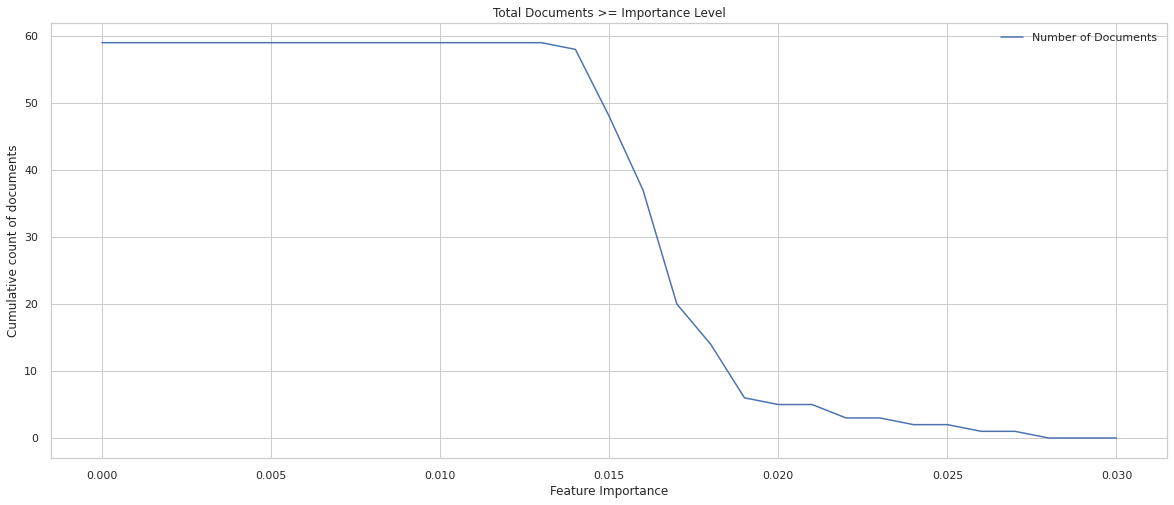

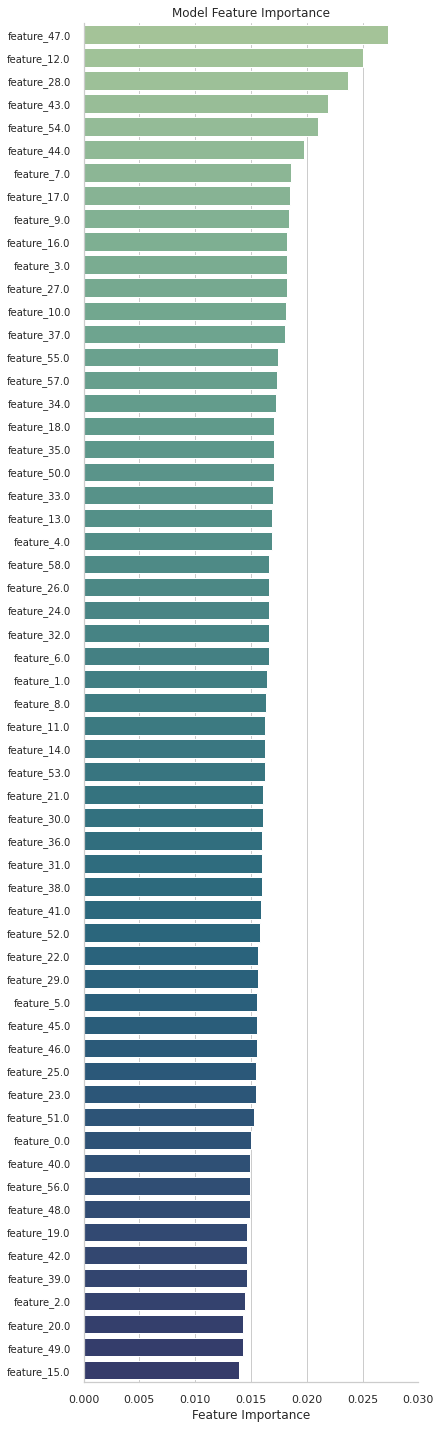

In [24]:
myExp.showBaseModelFeatureImportance()
myExp.showFinalModelFeatureImportance(startValue=0.01,
                                      increment=0.001,
                                      upperValue=0.03)

In [25]:
importlib.reload(dp)
importlib.reload(dps)
importlib.reload(DataExperiment)
importlib.reload(DataExperimentSupport)

<module 'DataExperimentSupport' from '/home/magni/ML_Root/project_root/utility_files/DataExperimentSupport.py'>

  0%|          | 0/202 [00:00<?, ?it/s]

Feature Importance Summary:
---> Original feature count: 59
---> Returned feature count: 59
---> Removed feature count: 0
---> Return items above (including): 0.002


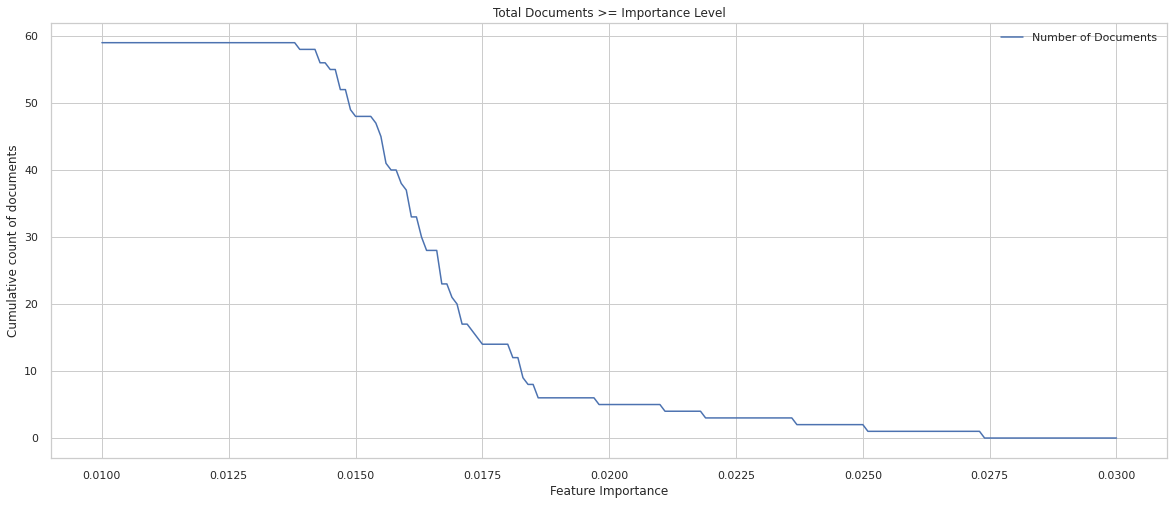

In [27]:
junk = myExp.analyzeFinalModelFeatureImportance(startValue=0.01,
                                         increment=0.0001,
                                         upperValue=0.03)

#  Save Experiment

In [ ]:
jarvis.saveExperiment(myExp, testFilename)

In [ ]:
testLoadExp = jarvis.loadExperiment(testFilename)

In [ ]:
testLoadExp.display()

# Scratchpad

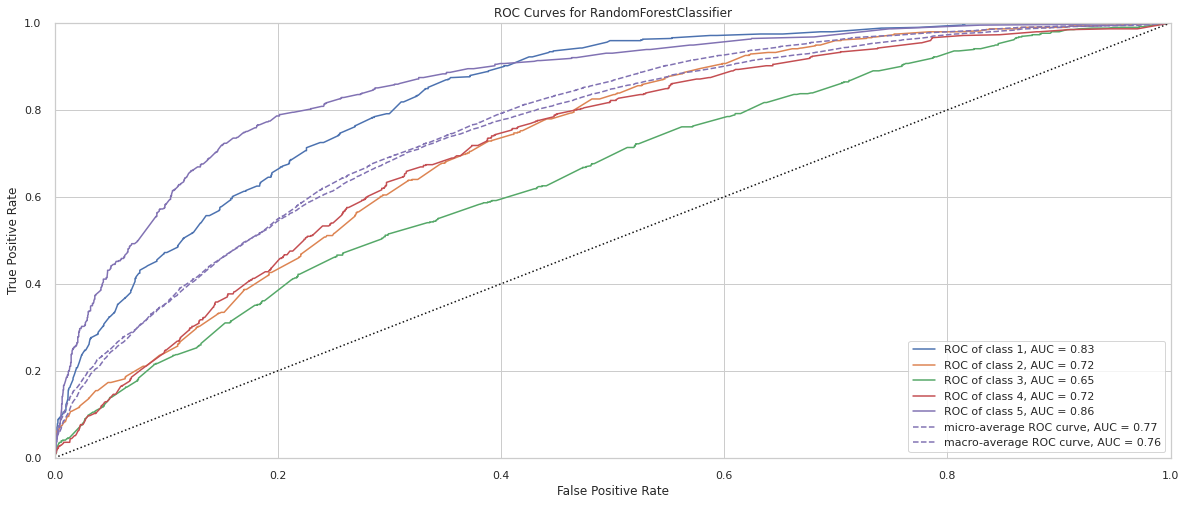

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [35]:
from yellowbrick.classifier import ROCAUC

# Instaniate the classification model and visualizer
model = myExp.getClassifier()
visualizer = ROCAUC(model, classes=[1, 2, 3, 4, 5])

targetColumn = myExp.dataPackage.targetColumn
dfTrain = myExp.dataPackage.getTrainData()
finalFeatures = myExp.finalFeatures

dfTest = myExp.dataPackage.getTestData()

# Fit the training data to the visualizer
visualizer.fit(dfTrain[finalFeatures],
               dfTrain[targetColumn]
              )

# Evaluate model
visualizer.score(dfTest[finalFeatures],
                 dfTest[targetColumn]
                )

visualizer.show()        

,y_test,y_pred
0,4.0,3.0
1,5.0,5.0
2,4.0,4.0
3,5.0,4.0
4,5.0,5.0


In [49]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

dfTest = myExp.finalModelPrediction
y_test = dfTest['y_test']
y_pred = dfTest['y_pred']

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
#auc = roc_auc_score(y_test, y_pred, multi_class='micro' )
#print('ROC AUC: %f' % auc)
# confusion matrix
#matrix = confusion_matrix(y_test, y_pred)
#print(matrix)

Accuracy: 0.424304
Precision: 0.418737
Recall: 0.424304
F1 score: 0.417569
Cohens kappa: 0.280399
